In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(20.0, 10.0)


#Reading Data
data=pd.read_csv('headbrain.csv')
print(data.shape)
data.head()

(237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [2]:
#convert head size value in X
X=data['Head Size(cm^3)'].values

In [3]:
#convert brain weight value in Y
Y=data['Brain Weight(grams)'].values

In [4]:
# mean x and y

mean_x=np.mean(X)
mean_y=np.mean(Y)


In [5]:
#Total number of value 
n=len(X)
print(n)

237


In [6]:
#pic equation implement

numer=0
denom=0
for i in range(n):
    numer+=(X[i]-mean_x)*(Y[i]-mean_y)
    denom+=(X[i]-mean_x)**2
    
b1=numer/denom;
b2=mean_y-(b1* mean_x)


In [7]:
# print value
print(b1,b2)

0.26342933948939945 325.57342104944223


In [8]:
#ploting value and regression line

max_x=np.max(X)+100
min_x=np.min(X)-100

In [9]:
#calculat line x and y
x=np.linspace(min_x,max_x,1000)
y=b2+b1*x

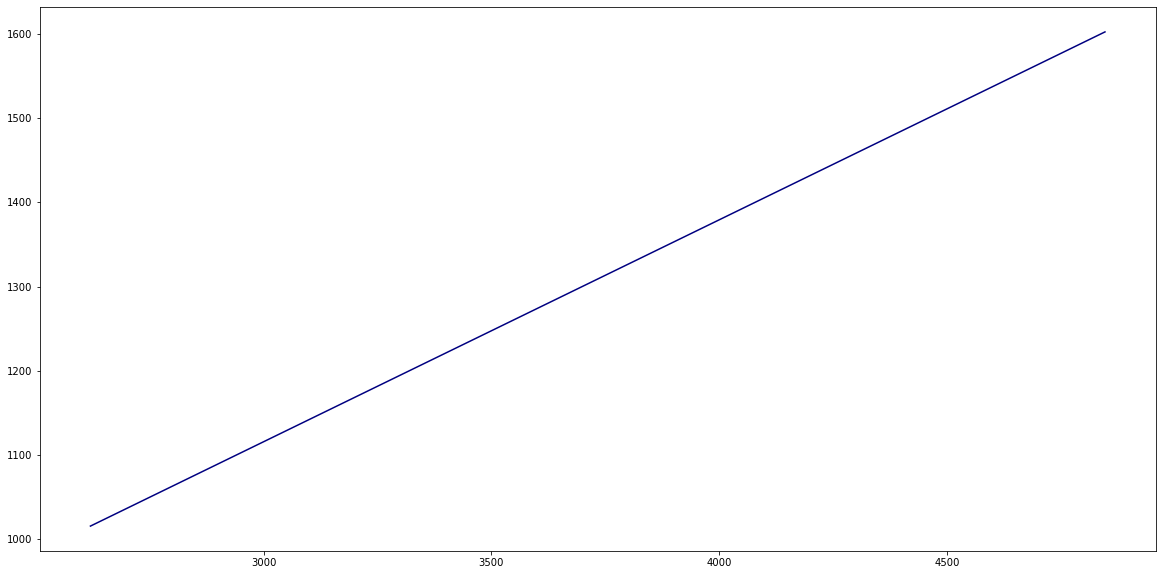

In [10]:
#ploting line
plt.plot(x,y,color='#000080', label='Regression line')

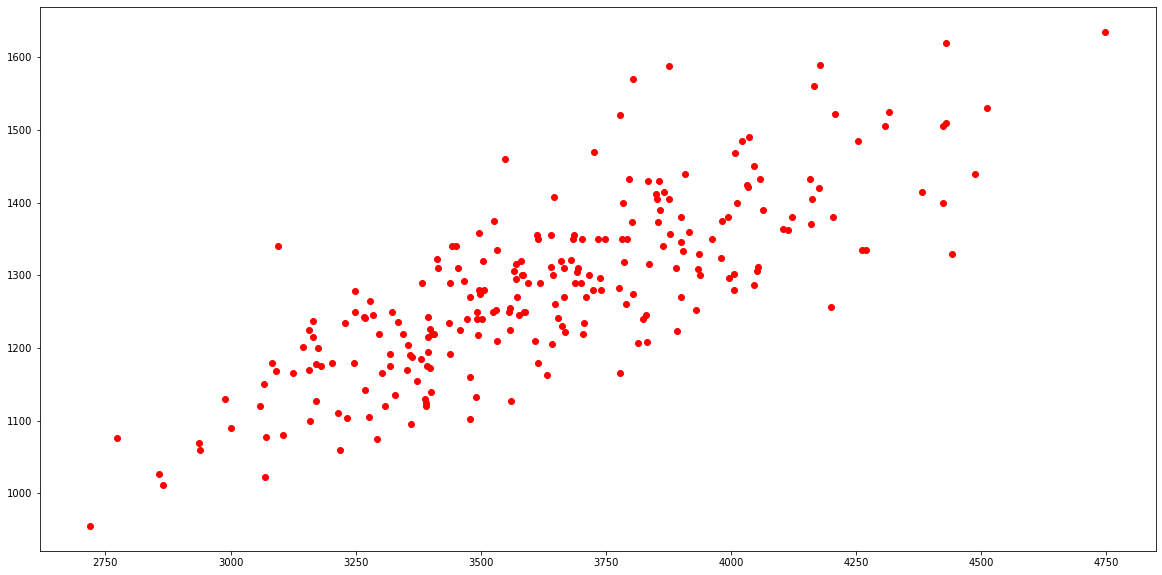

In [11]:
#ploting scatter point
plt.scatter(X,Y,c='#FF0000', label='scatter plot')

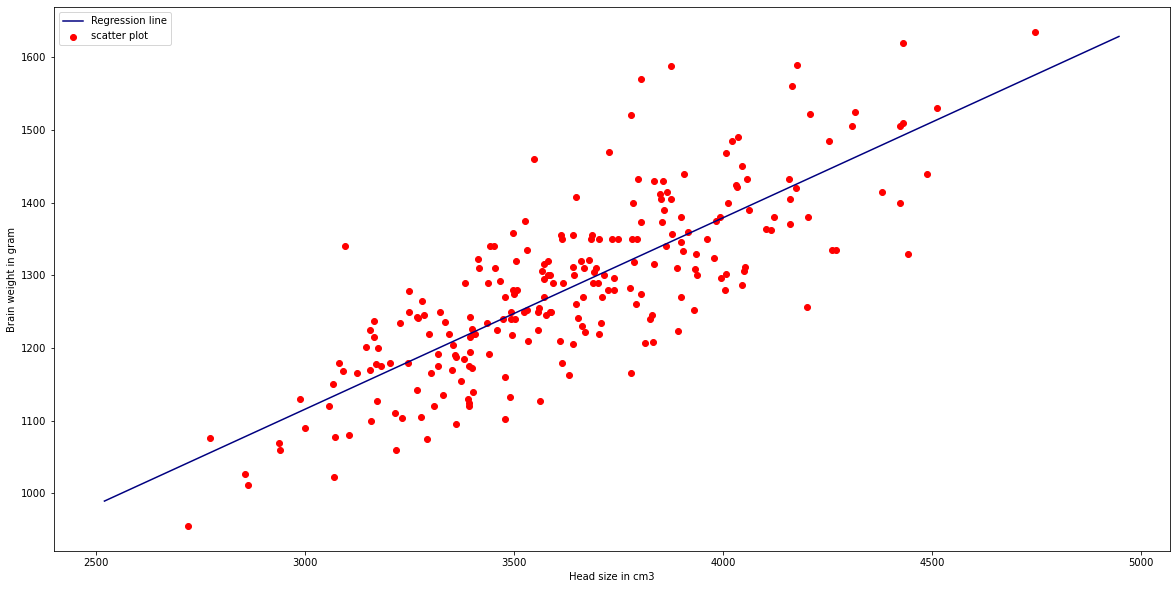

In [12]:
max_x=np.max(x)+100
min_x=np.min(x)-100

x=np.linspace(min_x,max_x,1000)
y=b2+b1*x
plt.plot(x,y,color='#000080', label='Regression line')
plt.scatter(X,Y,c='#FF0000', label='scatter plot')
plt.xlabel('Head size in cm3')
plt.ylabel('Brain weight in gram')
plt.legend()
plt.show()

In [13]:
# calculate R2
ss_t=0
ss_r=0
for i in range(n):
    y_pred=b2+b1*X[i]
    ss_t+=(Y[i]-mean_y)**2
    ss_r+=(Y[i]-y_pred)**2
r2=1-(ss_r/ss_t)
print(r2)

0.6393117199570003


# now  use sklean and check the r2 value

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [15]:
#cannot use rank 1 matrix in sklearn
X=X.reshape((n,1))

In [16]:
#creating model
reg=LinearRegression()

In [17]:
#fitting training data 
reg=reg.fit(X,Y)

In [18]:
#Y prediction
Y_pred=reg.predict(X)

In [19]:
#calculate r2 score
r2_score= reg.score(X,Y)

In [20]:
print(r2_score)

0.639311719957


# finally we get two model r2 value. we saw two value is same.

# Thanks#